# Regresi Linear Penentuan Produksi Beras di Sumatera



<h1>Import Data</h1>

terdapat beberapa import library package yaitu:
* Import Numpy untuk membentuk sebuah dimensional array, perhetungan pada aljabar linear dan matrix.</h2>
* Import Pandas untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.</h2>
* Import matplotlib dan Seaborn untuk membuat visualisasi data.</h2>


In [ ]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Membaca dataset dari csv </h1>

Gunakan metode pandas untuk memuat data dari folder csv()

In [ ]:
df = pd.read_csv("Data Tanaman Padi Sumatera.csv")

In [ ]:
# untuk melihat seberapa banyak data kita, kita dapat menggunakan metode head()
df.head(65)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
60,Sumatera Barat,1997,1787719.0,395728.0,2945.1,87.97,24.69
61,Sumatera Barat,1998,1807622.0,412810.0,5522.0,87.39,25.04
62,Sumatera Barat,1999,1897678.0,432254.0,4327.5,80.89,22.48
63,Sumatera Barat,2000,1759059.0,396919.0,3040.6,86.01,25.86


In [ ]:
#digunakan untuk melihat berapa banyak tabel tabel dan isinya berdasarkan data yang kita punya
df.shape

(224, 7)

Total data adalah 224 yang mana untuk setiap provinsi memiliki 28 data tahunan.

Dataset terdiri dari atribut berikut:
* Provinsi: Nama provinsi </h2>
* Tahun : Tahun produksi padi </h2>
* Produksi: Hasil produksi atau panen tahunan (ton)</h2>
* Luas Tanah: Luas Pertanian (hektar)</h2>
* Curah hujan: Jumlah rata-rata curah hujan dalam setahun (milimeter)</h2>
* Kelembaban: Tingkat kelembaban rata-rata dalam setahun (persentase)</h2>
* Suhu Rata-Rata: Derajat suhu rata-rata dalam setahun (celsius)</h2>
Atribut nomor 1 - 4 dikumpulkan dari Database Badan Pusat Statistik Indonesia, dan atribut lainnya dikumpulkan dari Database Badan Meteorologi, Klimatologi, dan Geofisika Indonesia

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


<h1> Menghitung Nilai yang Hilang di Setiap Kolom </h1>

In [ ]:
df.isna().sum()
#digunakan untuk menghitung nilai null

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [ ]:
df.describe()
#digunakan untuk menghasilkan ringkasan statistik dari objek DataFram

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


Hasil rata-rata di 8 provinsi selama 28 tahun adalah 1679700.887 ton dengan hasil terendah 42938 ton dan tertinggi 4881089 ton. Rata-rata luas lahan pertanian adalah 374350 hektar.

Dari uraian data di atas terlihat bahwa nilai rata-rata dan median dari masing-masing atribut tidak jauh berbeda. Sehingga dapat dikatakan bahwa data tersebut berdistribusi normal.

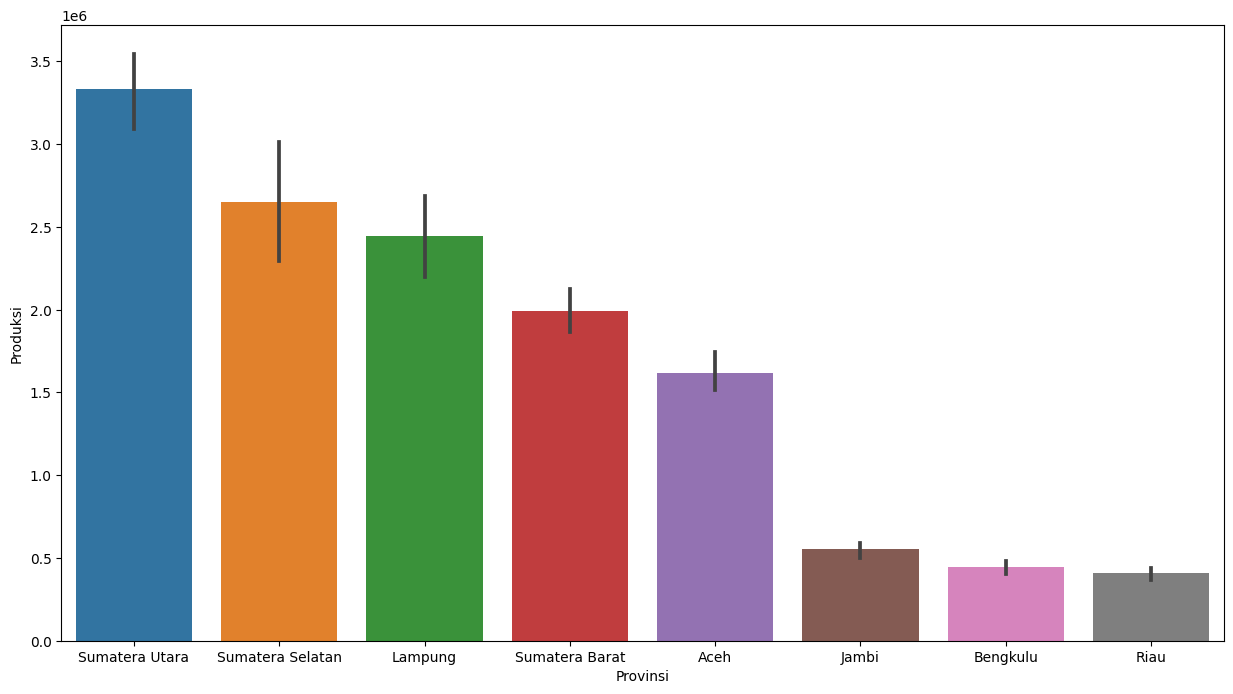

In [ ]:

plt.figure(figsize=(15, 8))
order = df.pivot_table(index='Provinsi', values='Produksi', aggfunc='mean').sort_values(by='Produksi', ascending=False).index
sns.barplot(data=df, x='Provinsi', y='Produksi', order=order)
plt.show()


In [ ]:
pd.pivot_table(df,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


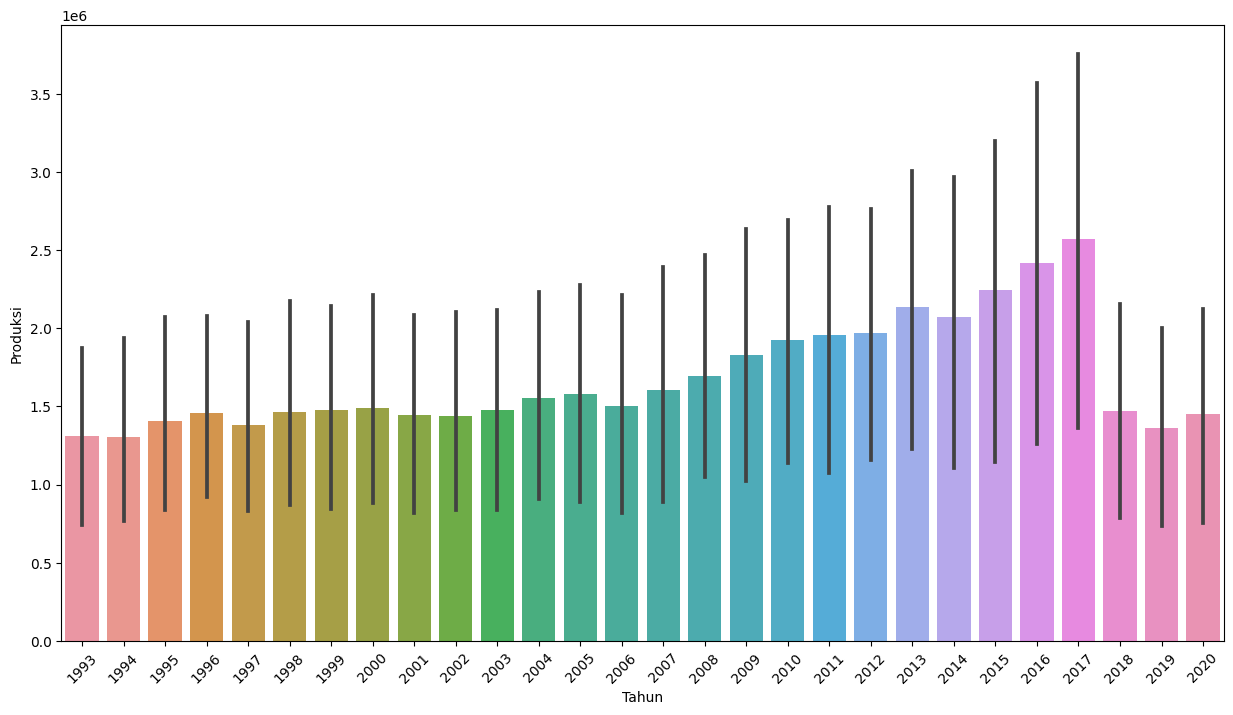

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Tahun', y='Produksi')
plt.xticks(rotation=45)
plt.show()

Tahun dengan produksi terbesar terjadi pada tahun 2017, namun pada tahun-tahun berikutnya produksi mengalami penurunan yang cukup signifikan.

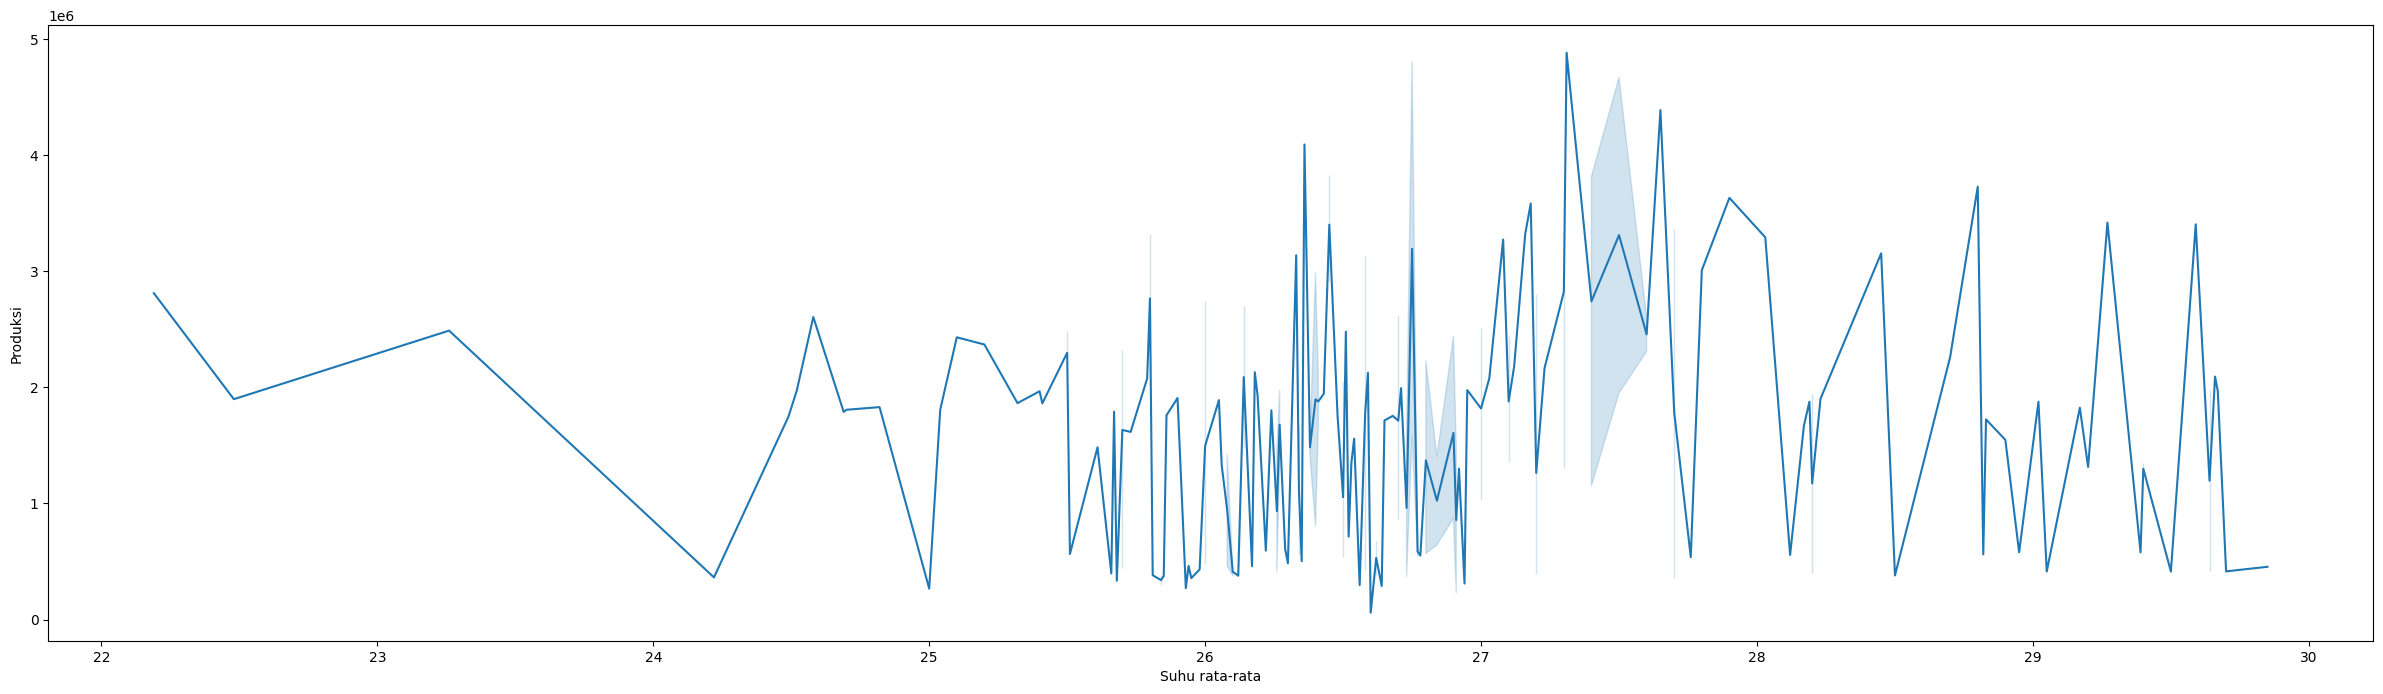

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(data=df, x='Suhu rata-rata', y='Produksi')
plt.show()


Produksi maksimal terjadi saat suhu rata-rata berada di kisaran 27-28 derajat Celcius.

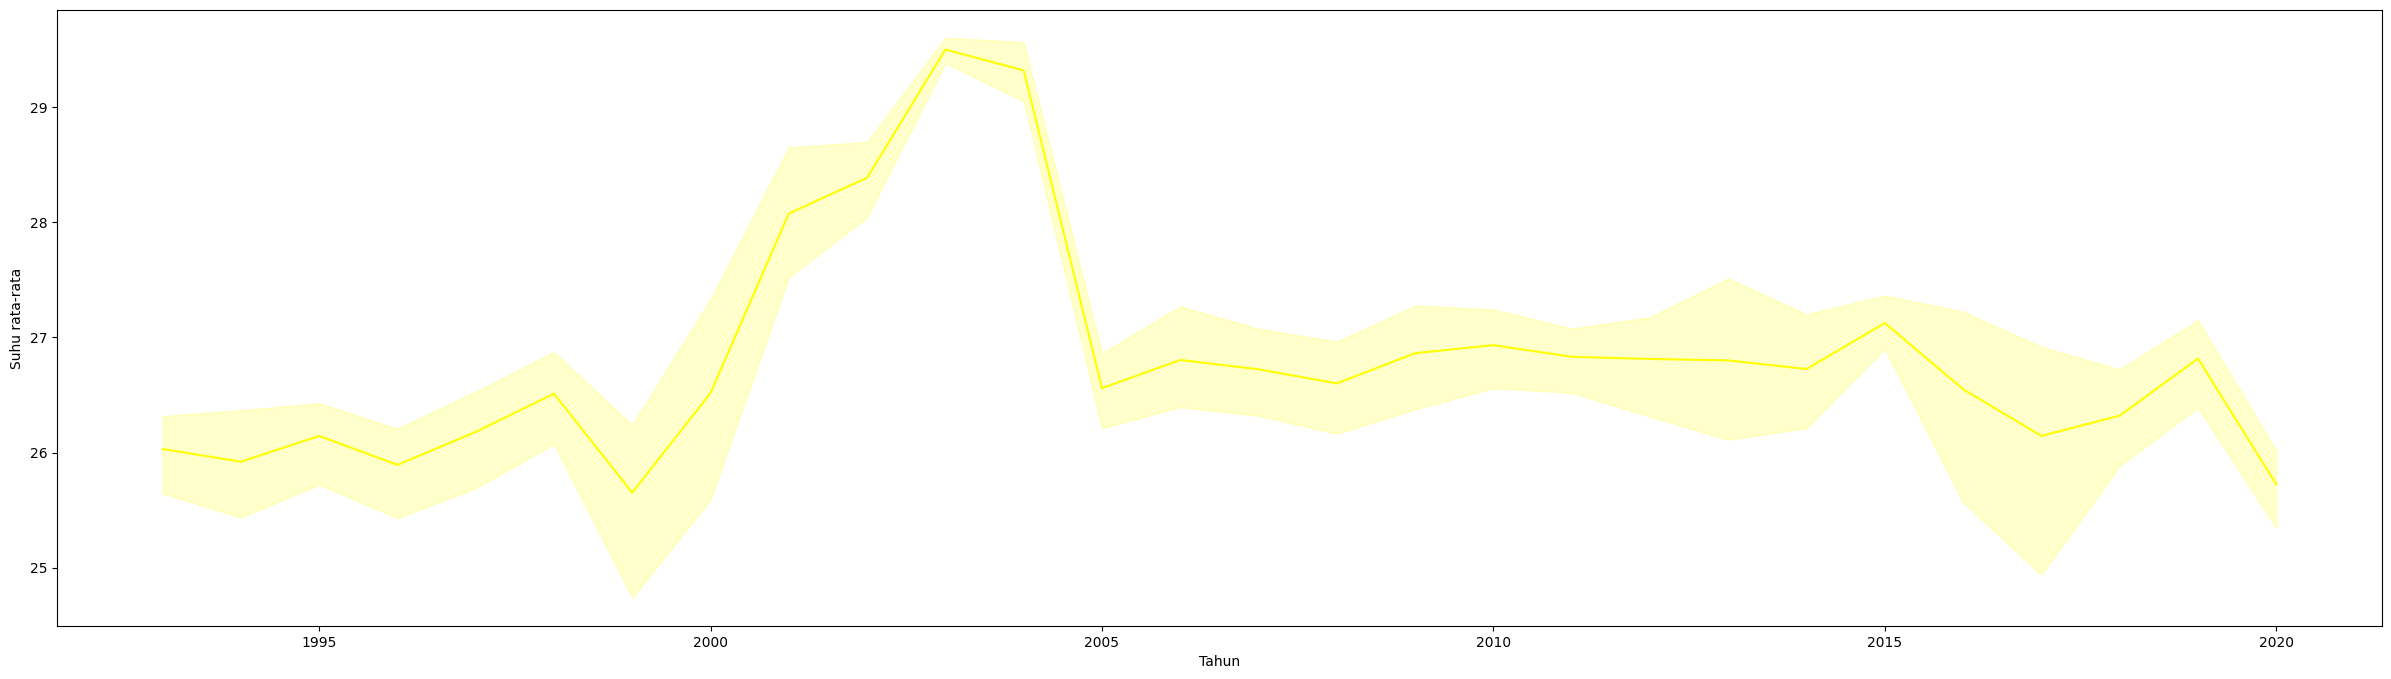

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(data=df, x='Tahun', y='Suhu rata-rata', color='yellow')
plt.show()

Suhu rata-rata tertinggi pernah dicapai pada tahun 2000-2005 yaitu lebih dari 29 derajat Celcius, namun pada tahun-tahun berikutnya cenderung stabil pada kisaran suhu 27 derajat Celcius.

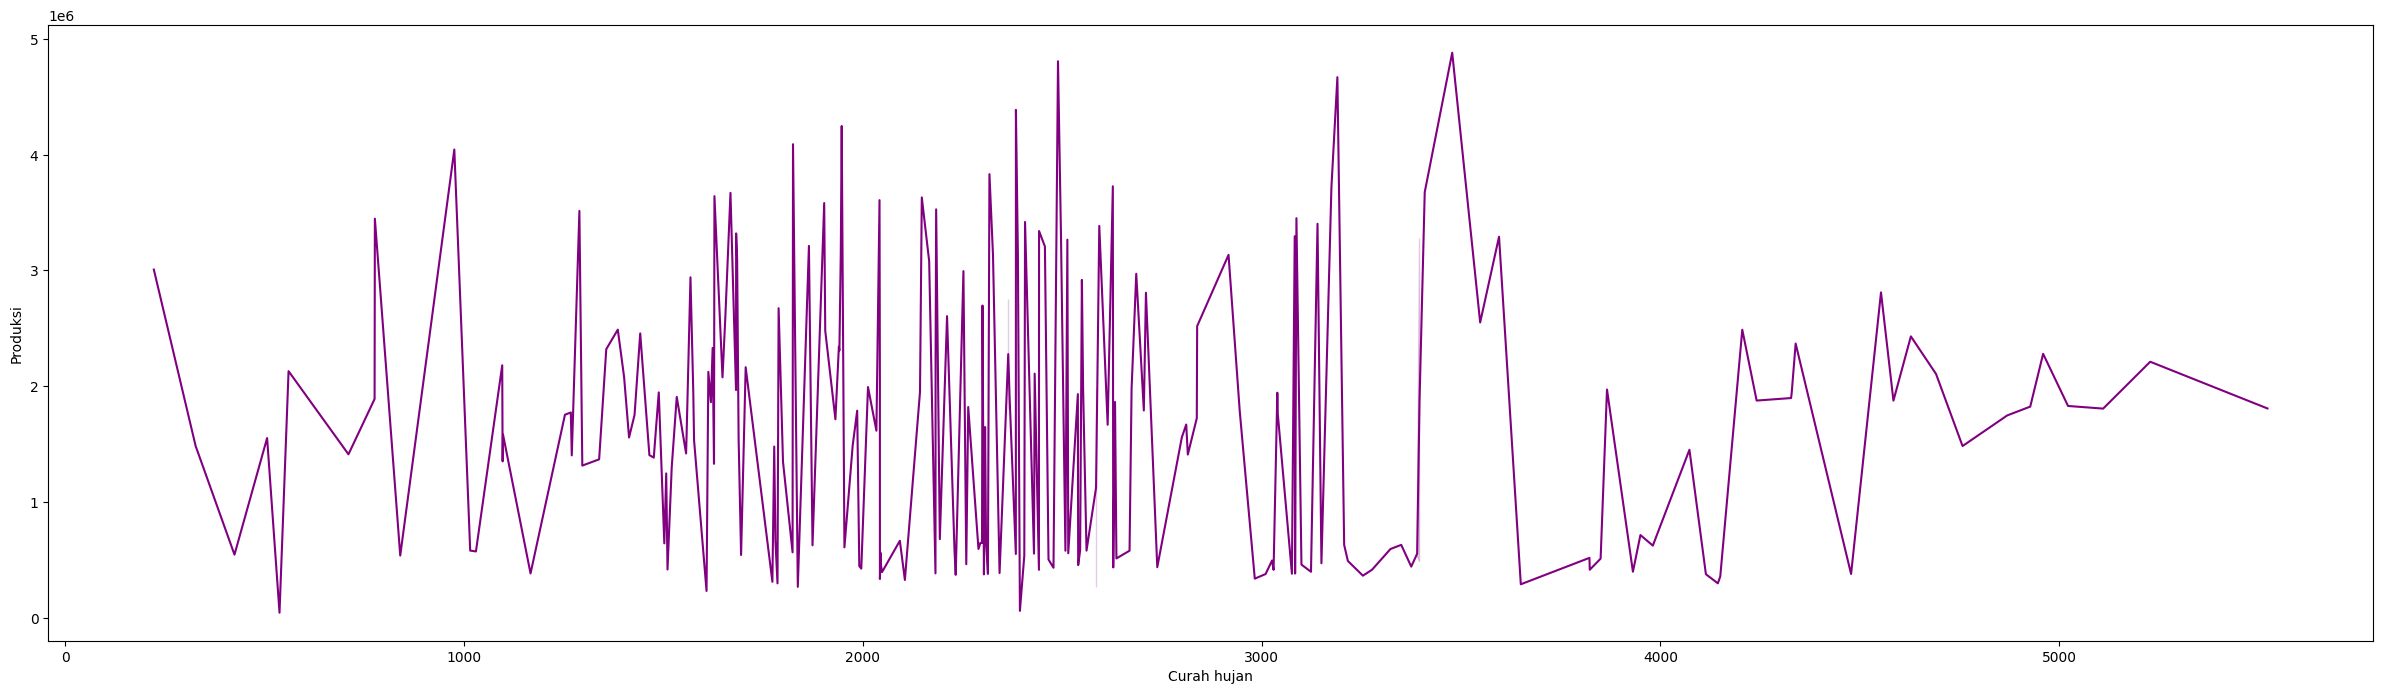

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(data=df, x='Curah hujan', y='Produksi', color='purple')
plt.show()


Dapat dikatakan bahwa produksi dapat lebih stabil pada curah hujan sedang, yaitu sekitar 2500mm per tahun.

<h1>Pengodean Fitur</h1>


Data kategorikal adalah variabel yang berisi nilai label, bukan nilai numerik. Jumlah nilai yang mungkin sering kali terbatas pada kumpulan tetap, seperti dalam kumpulan data ini, nilai 'Provinsi'. Banyak algoritme pembelajaran mesin tidak dapat beroperasi pada data label secara langsung. Mereka membutuhkan semua variabel input dan variabel output menjadi numerik. Ini berarti bahwa data kategorik harus diubah menjadi bentuk numerik.

One hot encoding adalah proses di mana variabel kategori diubah menjadi bentuk yang dapat diberikan ke algoritme ML untuk melakukan pekerjaan yang lebih baik dalam prediksi. Untuk tujuan itu, One-Hot Encoding akan digunakan untuk mengonversi kolom 'Province' menjadi one-hot numeric array.

Nilai kategori mewakili nilai numerik dari entri dalam dataset. Pengkodean ini akan membuat kolom biner untuk setiap kategori dan mengembalikan matriks dengan hasilnya.

In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,1329536.0,323589.0,1627.0,82.00,26.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,1299699.0,329041.0,1521.0,82.12,26.92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,1382905.0,339253.0,1476.0,82.72,26.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,1419128.0,348223.0,1557.0,83.00,26.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,1368074.0,337561.0,1339.0,82.46,26.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop(columns='Tahun')
df.tail()

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,3831923.00,390799.00,2317.6,79.40,26.45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,4090654.00,396559.00,1825.1,77.04,26.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,2488641.91,511940.93,1385.8,76.05,25.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,2164089.33,464103.42,1706.4,78.03,27.23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,2604913.29,545149.05,2211.3,75.80,24.58,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<h1>Regresi Linear</h1>

pada bagian ini, data dibagi menjadi dua bagian yaitu data training dan data testing yang digunakan untuk melakukan pengujian. pembagian data tersebut dapat digunakan dengan beberapa persen, bisa dengan 70'/30 ataupun 80/20 untuk melakukan testing.


In [ ]:
df.corr().style.background_gradient().set_precision(2)

<ipython-input-16-62540e5ff327>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
Produksi,1.00,0.91,-0.04,-0.05,0.04,-0.02,-0.40,-0.37,0.25,-0.41,0.10,0.32,0.54
Luas Panen,0.91,1.00,-0.09,-0.06,0.12,-0.04,-0.43,-0.36,0.23,-0.40,0.05,0.40,0.55
Curah hujan,-0.04,-0.09,1.00,0.06,-0.23,-0.35,0.28,-0.17,-0.19,0.00,0.52,-0.01,-0.09
Kelembapan,-0.05,-0.06,0.06,1.00,-0.41,-0.03,0.12,0.07,-0.15,-0.05,0.04,-0.01,0.01
Suhu rata-rata,0.04,0.12,-0.23,-0.41,1.00,0.07,-0.07,0.05,-0.01,0.07,-0.36,0.09,0.16
Provinsi_Aceh,-0.02,-0.04,-0.35,-0.03,0.07,1.00,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14
Provinsi_Bengkulu,-0.40,-0.43,0.28,0.12,-0.07,-0.14,1.00,-0.14,-0.14,-0.14,-0.14,-0.14,-0.14
Provinsi_Jambi,-0.37,-0.36,-0.17,0.07,0.05,-0.14,-0.14,1.00,-0.14,-0.14,-0.14,-0.14,-0.14
Provinsi_Lampung,0.25,0.23,-0.19,-0.15,-0.01,-0.14,-0.14,-0.14,1.00,-0.14,-0.14,-0.14,-0.14
Provinsi_Riau,-0.41,-0.40,0.00,-0.05,0.07,-0.14,-0.14,-0.14,-0.14,1.00,-0.14,-0.14,-0.14


In [ ]:
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (179, 12)
x_test : (45, 12)
y_train : (179, 1)
y_test : (45, 1)


In [ ]:
x_train[:15]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
33,823749.00,2496.9,83.53,27.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
144,469670.00,1558.3,78.47,26.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196,433078.00,2306.7,84.82,26.41,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
200,454087.00,1253.3,78.46,26.68,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
138,69536.06,1773.4,81.44,26.94,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
116,190608.00,1030.1,80.64,26.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
188,147680.00,3980.9,83.93,26.70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
218,707266.00,1628.1,78.90,27.10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,359375.00,1577.0,78.70,26.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,156803.00,2561.0,82.74,28.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test.tail()

,Produksi
97,42938.0
143,1666591.0
152,2320110.0
106,393917.0
201,1975700.0


In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

#tahap pemodelan data
#Pertama, buat variabel x dan y.
x = df.drop(columns='Produksi' , axis=1)
y = df['Produksi']

#Kedua, split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#Ketiga, membuat object linear regresi.
lin_reg = LinearRegression()

#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)

#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 2.59610890e+00  5.83064066e+01  1.46208611e+03 -4.20885381e+04
  9.78585149e+04 -6.01864513e+05 -5.03993597e+05  3.95515603e+05
 -6.25280570e+05  1.01719323e+05  3.29389792e+05  8.06655447e+05]
1575121.7085459728


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  85.6528761180902
Test  :  80.8682404375932 

The Average Cross Validation Score is 82.9
